# Spam Text Message Classification using NLP

### What is NLP 

Natural Language Processing (NLP) is the field of Artificial Intelligence.

#### Application of NLP
- Text Classification
- Spam Filters
- Voice text messaging
- Sentiment analysis
- Spell or grammar check
- Chat bot
- Search Suggestion
- Search Autocorrect
- Automatic Review Analysis system
- Machine translation
- And so much more

- Natural Language Understanding (Text classification)

- Natural Language Generation (Text Generation)

### How to get started with NLP 

- #### Sklearn

- #### Spacy

- #### NLTK


#### For what to use these libraries 

- Tokenization
- Parts of Speech Tagging
- Entity Detection
- Dependency Parsing
- Nouse Phrases
- Words-to-Vectors Integration
- Context Derivation
- and so much more

### Data Cleaning Options
- Case Normalization
- Removing Stop Words
- Removing Punctuations or Special Symbols
- Lemmatization or Stemming
- Parts of Speech Tagging
- Entity Detection
- Bag of Words
- Word-to-Vec

### What will be covered in this video series 

- Introduction of NLP and Spam detection using sklearn 
- Reading Text and PDF files in Python
- Tokenization
- Parts of Speech Tagging
- Word-to-Vectors
- Then real-world practical examples



## Let's Get Started 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df)

5572

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### Balence this data 

In [7]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [12]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis 

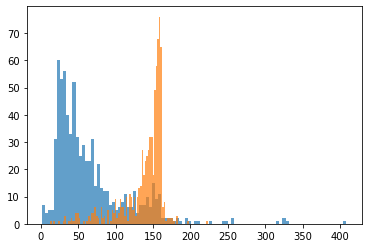

In [13]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7)

plt.show()

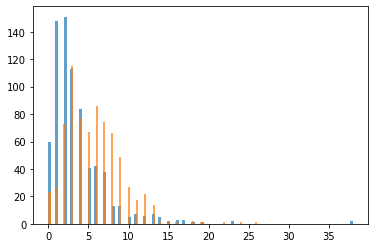

In [15]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)

plt.show()

### Data Preparation 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
data.head()

,label,message,length,punct
0,ham,"How long has it been since you screamed, princ...",50,2
1,ham,"Haha I heard that, text me when you're around",45,2
2,ham,K da:)how many page you want?,29,3
3,ham,I think its far more than that but find out. C...,90,2
4,ham,This message is from a great Doctor in India:-...,106,6


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'])

In [20]:
### Bag of Words Creation

In [45]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [46]:
X_train_vect.shape

(1045, 3605)

In [47]:
X_train_vect

<1045x3605 sparse matrix of type '<class 'numpy.float64'>'
	with 17302 stored elements in Compressed Sparse Row format>

In [48]:
1045*3708

3874860

### Pipeline and RF 

In [49]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [50]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [51]:
y_pred = clf.predict(X_test)

In [52]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 28, 196]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [54]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [35]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [36]:
clf.predict(["you have won tickets to the USA this summer."])

array(['ham'], dtype=object)

### SVM

In [37]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [38]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [39]:
y_pred = clf.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred)

array([[216,   9],
       [ 16, 208]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.96      0.95       225
        spam       0.96      0.93      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [42]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [43]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [44]:
clf.predict(["you have got free tickets to the USA this summer."])

array(['spam'], dtype=object)